In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math
    
    #data                = orignial csv data
    #data_fixed          = original csv with the average of two measuments with the average speed for each
    #df_mru              = contains only the data_fixed for MRU movements
    #df_muv              = contains only the data_fixed for MUV movements 
    #pessoas             = array with keys of data_fixed for each person
    #df_mru_ppl          = dictionary with people and their respective MRU data with average
    #df_muv_ppl          = dictionary with people and their respective MUV data with average
    #plt_data_mru        = matrix with the MRU averages of each person by distance
    #plt_data_muv        = matrix with the MUV averages of each person by distance
    #plt_data_mru_ln     = matrix with the lg of each element of plt_data_mru
    #plt_data_muv_ln     = matrix with the lg of each element of plt_data_muv
    #plt_ideal_mru       = matrix with the ideal MRU averages of each person by distance
    #plt_ideal_muv       = matrix with the ideal MUV averages of each person by distance
    #plt_ideal_mru_ln    = matrix with the lg of each element of plt_ideal_mru
    #plt_ideal_muv_ln    = matrix with the lg of each element of plt_ideal_muv
    #plt_data_mru_euler  = matrix with MRU euler positions for plotting
    #plt_data_muv_euler  = matrix with MUV euler positions for plotting
    #plt_data_mru_ana    = matrix with MRU analytical positions for plotting
    #plt_data_muv_ana    = matrix with MUV analytical positions for plotting

In [4]:
#
#Auxiliary functions
#
def separador():
    print("----------------------------------------------------------------------------------------------------")

def nextXeuler(x,t,params,dt):
    """ 
    nextXeuler implementa o método de Euler. 
        
    Parâmetros:
    -----------
    x: float - Posição atual
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    dt: float - passo de tempo
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    return x + dt*(2*params[0]*t + params[1])
    ### END SOLUTION

def nextXana(t,params):
    """ 
    nextXana implementa o método analítico. 

    Parâmetros:
    -----------
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    # S = S0 + V0*t + 0.5*a*t*t
    return params[0] + t*params[1] + t*t*params[0]
    ### END SOLUTION


In [5]:
#
#Le arquivo com tempos obtidos de experimentos
#
data = pd.read_csv("../DADOS/tempos.csv")

#print(data)

In [7]:
#
#calculates the average of the two time measurements
#
data_fixed = data.copy()
#selects the three first columns
data_fixed = data_fixed.loc[:, 'Pessoa' : 'Travessia']
#adds columns containing the time values
for i in range(1, 4):
    data_fixed[str(i) + "0m"] = (data.iloc[:, (i * 2) + 1] + data.iloc[:, (i * 2) + 2]) / 2
#calcules the average speed
data_fixed["Velocidade_media"] = (30.0 / data_fixed["30m"])

#print(data_fixed)

In [10]:
#saves data separetely
df_mru = data_fixed[0:9]
df_muv = data_fixed[9:18]

#print(df_mru)
#print(df_muv)

    Pessoa Tipo_mov  Travessia    10m     20m     30m  Velocidade_media
0  Matheus      MRU          1  7.370  14.730  21.770          1.378043
1  Matheus      MRU          2  6.900  13.610  20.790          1.443001
2  Matheus      MRU          3  7.255  14.755  21.485          1.396323
3  Gabriel      MRU          1  8.210  15.555  22.665          1.323627
4  Gabriel      MRU          2  8.210  15.030  22.050          1.360544
5  Gabriel      MRU          3  8.345  16.330  23.590          1.271725
6     Kazu      MRU          1  6.680  12.925  19.105          1.570270
7     Kazu      MRU          2  6.910  13.045  19.480          1.540041
8     Kazu      MRU          3  6.990  13.485  20.015          1.498876


In [142]:
#
#Separates data by people
#
#creates dictionary
pessoas = data_fixed["Pessoa"].unique()
df_mru_ppl = {}
df_muv_ppl = {}
for p in pessoas:
    #adds average for MRU
    aux = df_mru[df_mru.Pessoa == p]
    valSum10 = aux["10m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    aux.loc[3] = [p, "MRU", 4.0, valSum10, valSum20, valSum30, 30/valSum30]
    df_mru_ppl[p] = aux
    #adds average to MUV
    aux = df_muv[df_muv.Pessoa == p]
    valSum10 = aux["10m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    aux.loc[3] = [p, "MUV", 4.0, valSum10, valSum20, valSum30, 30/valSum30]
    df_muv_ppl[p] = aux

#print(pessoas)
#print (df_mru_ppl)
#print (df_muv_ppl)

/home/mtlaurentys/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mtlaurentys/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
#
#Builds data for plotting
#
#auxiliary
xRange = [0,10,20,30]
muv_params = 
     [0,#acceleration
      0,#initial speed
      0]#initial position
mru_params = muv_params.copy()
#gets data from data frames to arrays
plt_data_mru = []
plt_data_muv = []
plt_data_mru_ln = []
plt_data_muv_ln = []
#only saves the average for plotting
plt_ideal_mru = []
plt_ideal_muv = []
plt_ideal_mru_ln = []
plt_ideal_muv_ln = []
i = 0
for p in pessoas:
    #initializes
    plt_data_mru.append([])
    plt_data_muv.append([])
    plt_data_mru_ln.append([0 for k in range (3)])
    plt_data_muv_ln.append([0 for k in range (3)])
    plt_ideal_mru.append([])
    plt_ideal_muv.append([])
    plt_ideal_mru_ln.append([0 for k in range (3)])
    plt_ideal_muv_ln.append([0 for k in range (3)])
    #calculates
    plt_data_mru[i] = df_mru_ppl[p].loc[3, "10m" : "30m"].values
    auxMRU = plt_data_mru[i][2]/3
    plt_ideal_mru[i] = [auxMRU, 2*auxMRU, 3*auxMRU]
    plt_data_muv[i] = df_muv_ppl[p].loc[3, "10m" : "30m"].values
    auxMUV = plt_data_muv[i][2]/3
    plt_ideal_muv[i] = [auxMUV, 2*auxMUV, 3*auxMUV]
    for j in range(3):
        plt_data_mru_ln[i][j] = math.log(plt_data_mru[i][j])
        plt_data_muv_ln[i][j] = math.log(plt_data_muv[i][j])
        plt_ideal_mru_ln[i][j] = math.log(plt_ideal_mru[i][j])
        plt_ideal_muv_ln[i][j] = math.log(plt_ideal_muv[i][j])
    i += 1
#inserts zeros to improve plotting
for i in range(3):
    plt_data_mru[i] = np.insert(plt_data_mru[i], 0,0)
    plt_data_muv[i] = np.insert(plt_data_muv[i], 0,0)
    plt_data_mru_ln[i] = np.insert(plt_data_mru_ln[i], 0,0)
    plt_data_muv_ln[i] = np.insert(plt_data_muv_ln[i], 0,0)
    plt_ideal_mru[i] = np.insert(plt_ideal_mru[i], 0,0)
    plt_ideal_muv[i] = np.insert(plt_ideal_muv[i], 0,0)
    plt_ideal_mru_ln[i] = np.insert(plt_ideal_mru_ln[i], 0,0)
    plt_ideal_muv_ln[i] = np.insert(plt_ideal_muv_ln[i], 0,0)


#print(plt_data_mru)
#print(plt_data_muv)
#print(plt_data_mru_ln)
#print(plt_data_muv_ln)
#print(plt_ideal_mru)
#print(plt_ideal_muv)
#print(plt_ideal_mru_ln)
#print(plt_ideal_muv_ln)

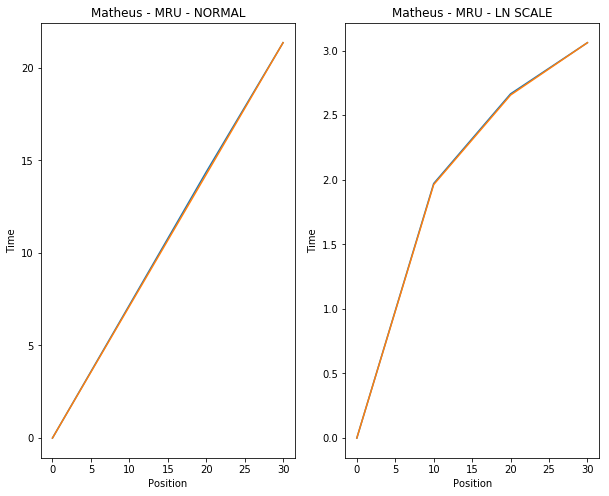

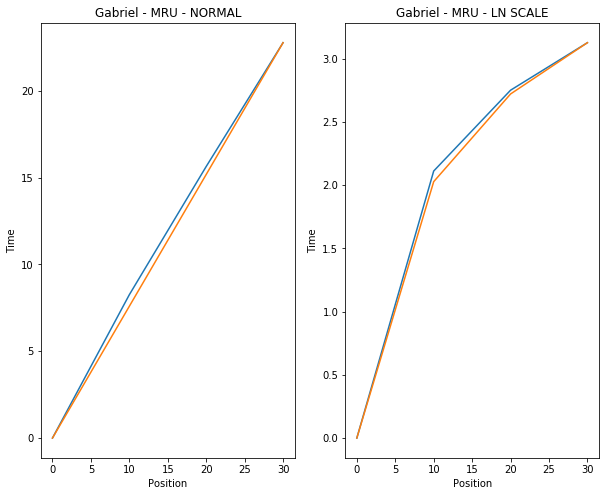

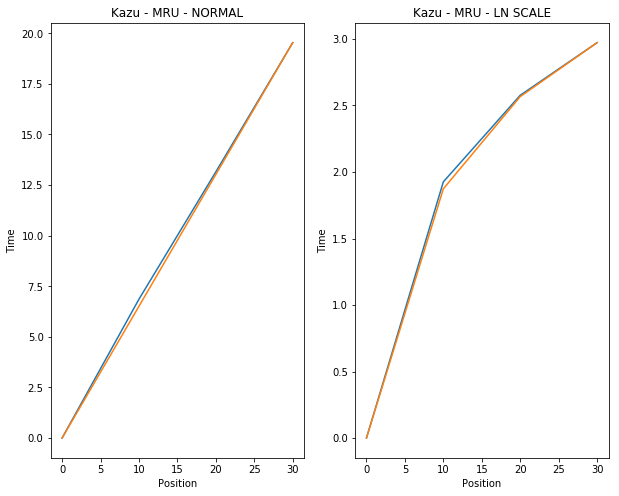

In [159]:
#plotar graficos
aux = len(pessoas)
for i in range(1, aux+1):
    #prints MRU
    plt.figure(aux*i, figsize=(10, 8))
    d_plt = plt.subplot(1, 2, 1)
    d_plt.plot(xRange, plt_data_mru[i - 1])
    d_plt.plot(xRange, plt_ideal_mru[i - 1])
    d_plt.set(ylabel = 'Time', xlabel = 'Position', title = str(pessoas[i - 1] + " - MRU - NORMAL"))
    #prints MRU with ln scale
    plt.figure(aux*i, figsize=(10, 8))
    ln_plt = plt.subplot(1, 2, 2)
    ln_plt.plot(xRange, plt_data_mru_ln[i - 1])
    ln_plt.plot(xRange, plt_ideal_mru_ln[i - 1])
    ln_plt.set(ylabel = 'Time', xlabel = 'Position', title = str(pessoas[i - 1] + " - MRU - LN SCALE"))
    